# Exploratory-data-analysis (Spotify dataset)


We will analyse the spotify dataset and try to understand the data.

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.7 MB/s 


In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="Exploratory-data-analysis")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


**Importing the libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#a3a35dea0a34871c9c1caf535803a966
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od
download_url="https://www.kaggle.com/datasets/geomack/spotifyclassification"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: labheshmahajan
Your Kaggle Key: ··········


100%|██████████| 98.4k/98.4k [00:00<00:00, 16.8MB/s]

In [7]:
df=pd.read_csv("/content/spotifyclassification/data.csv")

In [8]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


# **Data cleaning**

we get to know that there is some unwanted data and we cannot analyse the data properly so we have to clean the data 

In [9]:
df.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [11]:
df.shape

(2017, 17)

In [12]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [13]:
len(df.columns)

17

In [14]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Data analysis

From this point onwards we will start the exploratory data analysis using several data in sub parts

**Top 5 most popular artists**

In [15]:
top_five_artists=df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]

In [16]:
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

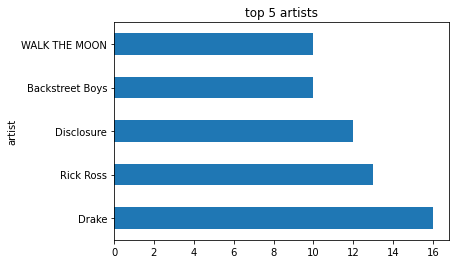

In [17]:
top_five_artists.plot.barh()
plt.title("top 5 artists")
plt.show()


**Top 5 loudest tracks**

In [18]:
top_five_loudest_tracks=df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


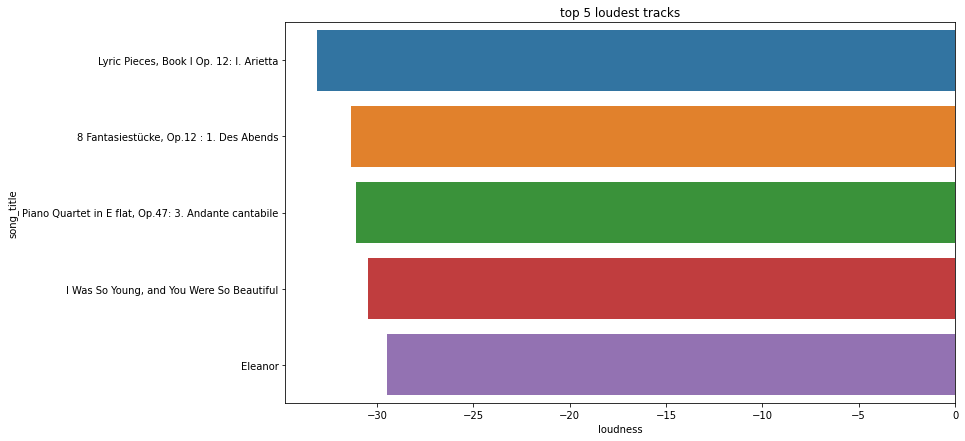

In [19]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness",y="song_title",data=top_five_loudest_tracks)
plt.title("top 5 loudest tracks")
plt.show();

**Artists with most danceability songs**

In [20]:
top_five_danceable_songs=df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]

In [21]:
top_five_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


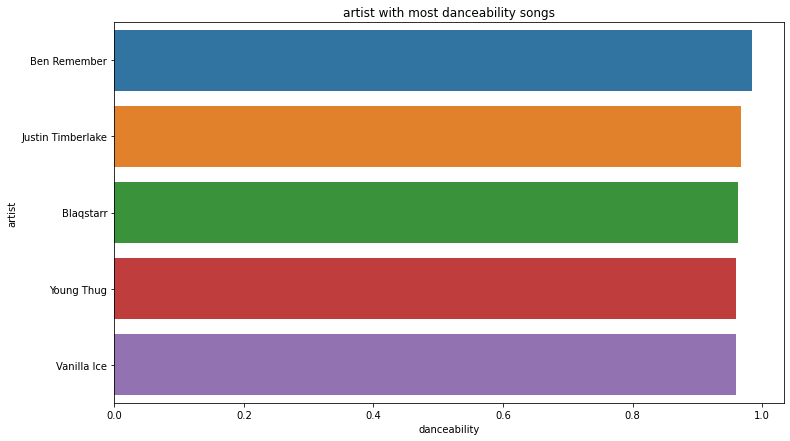

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability",y="artist",data=top_five_danceable_songs)
plt.title("artist with most danceability songs")
plt.show()

**Top 10 instrumentainess tracks**

In [27]:
top_ten_instrumental_tracks=df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:5]
top_ten_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


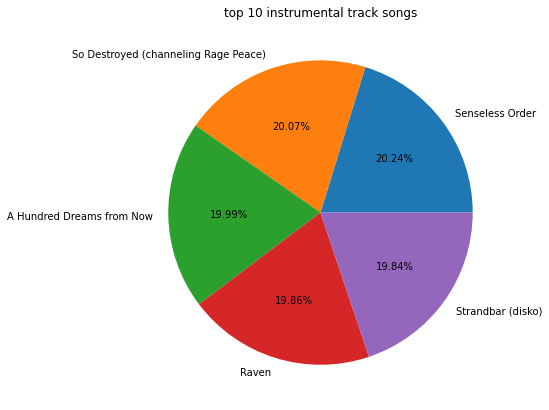

In [37]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness",data=top_ten_instrumental_tracks,autopct="%1.2f%%",labels=top_ten_instrumental_tracks.song_title)
plt.title("top 10 instrumental track songs")
plt.show();